In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df= pd.read_csv('Housing.csv')

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
df.shape

(545, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
df.nunique()

,0
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


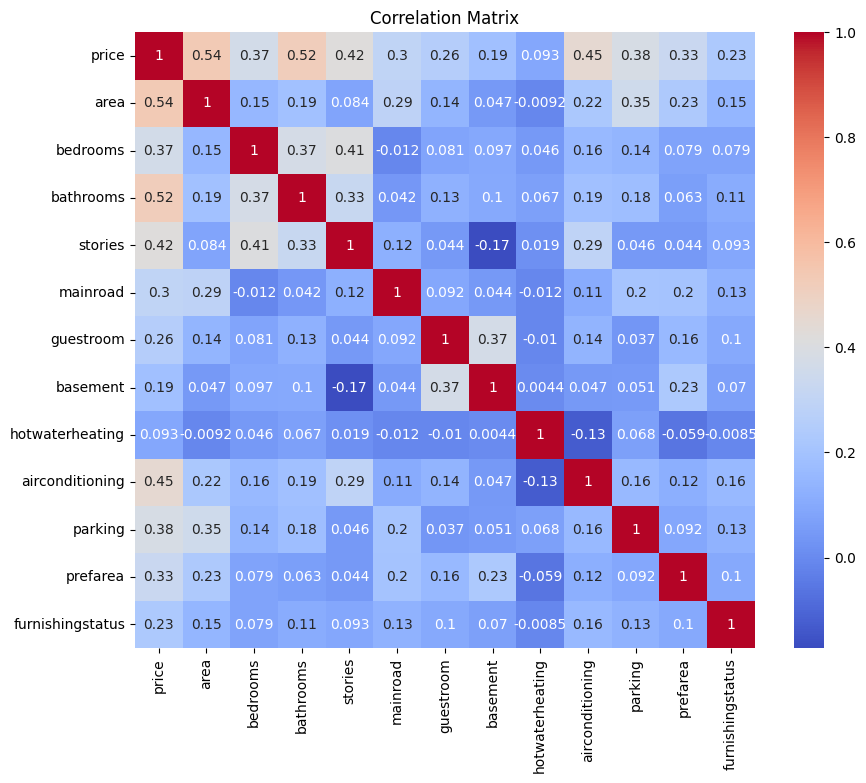

In [22]:
df_corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [23]:
df_remove=['stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']
df=df.drop(columns=df_remove)
df.head()

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


In [27]:
import scipy.stats as stats
z_score= stats.zscore(df)
threshold=3
print("Size before removing outliers:",df.shape)
outlier=df[(z_score>threshold).any(axis=1)]
df=df[(z_score<=threshold).all(axis=1)]
print("Size after removing outliers:",df.shape)
outlier.head()

Size before removing outliers: (512, 4)
Size after removing outliers: (509, 4)


,price,area,bedrooms,bathrooms
171,5250000,10269,3,1
224,4760000,10240,2,1
277,4305000,10360,2,1


In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
df_scaled=pd.DataFrame(scaler.transform(df),columns=df.columns)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
x=df.drop('price',axis=1)
y=df['price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [31]:
print(f"xtrain{x_train.shape}")
print(f"xtest{x_test.shape}")

xtrain(381, 3)
xtest(128, 3)


In [32]:
models=[('Random Forest',RandomForestRegressor()),
        ('Linear Regression', LinearRegression()),
        ('Decission Tree', DecisionTreeRegressor()),
        ('KNN',KNeighborsRegressor())]

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
for name,model in models:
  print(name)
  print()
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print("Mean Squared Error (MSE):",mean_squared_error(y_test,y_pred))
  print("Mean Absolute Error (MAE):",mean_absolute_error(y_test,y_pred))
  print("R-Squared (R²) :",r2_score(y_test,y_pred))

Random Forest

Mean Squared Error (MSE): 1669641607441.7944
Mean Absolute Error (MAE): 1019334.2725433421
R-Squared (R²) : 0.46227387036786316
Linear Regression

Mean Squared Error (MSE): 1513640279460.5796
Mean Absolute Error (MAE): 967790.9402575752
R-Squared (R²) : 0.5125157845241242
Decission Tree

Mean Squared Error (MSE): 2097285519147.0486
Mean Absolute Error (MAE): 1128885.9895833335
R-Squared (R²) : 0.32454652548314367
KNN

Mean Squared Error (MSE): 2149617489917.1875
Mean Absolute Error (MAE): 1116818.28125
R-Squared (R²) : 0.307692448552607


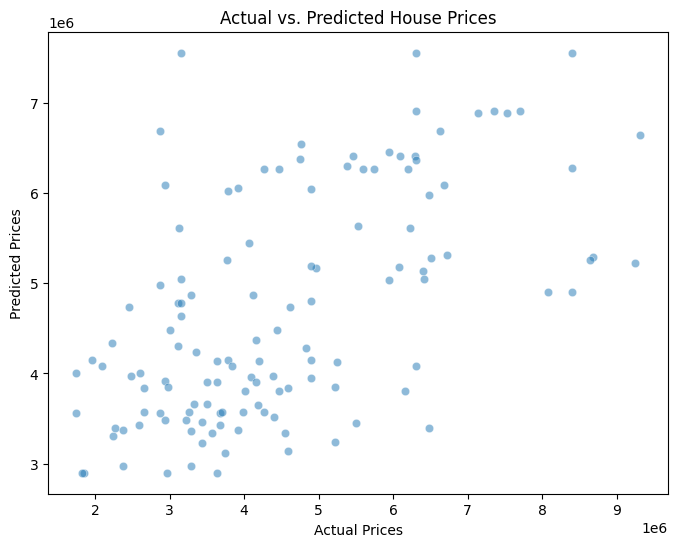

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()